In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#10/2023

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO*

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$

$$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O*

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$  <br> 

Reaction 4:&emsp;Surface Reaction of CO* and ${O_2}^*$ / Adsorption of $CO_2$

$$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}(g) + 2* $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix}
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



# REACTOR MODELLING
***

In [2]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Pipe-PFR.svg/464px-Pipe-PFR.svg.png?20081128031804')

In [3]:
Image(url='http://websites.umich.edu/~elements/asyLearn/bits/pfrfinal/lec1-9.gif')

$$ \left[ \text{Rate of flow In} \right] - \left[ \text{Rate of flow Out} \right] + \left[\text{Rate of Generation}\right]  = \left[\text{Rate of Accumulation}\right] $$

$$ F_{A0} - F_{A} + \int_{0}^{V} r_A \,dV = \frac{dN_A}{dt} $$

Note -> Assume Steady State:

$$\frac{dN_A}{dt} = 0 $$
Therefore, 
$$F_{A0} - F_{A} + \int_{0}^{V} r_A \,dV = 0$$
Differentiating gives:
$$ \frac{dF_A}{dV} = r_A $$

In [6]:
def adiabatic_pfr(deltaV, finalV, FA0, FI0, Pressure, T0, E, deltaH, sum_reactant_coefficients, Cp, eps, A, R1=1.987, R2=0.082):
    """
    This function is intended to be used for an adiabatic PFR at steady state with constant pressure
        and a gas phase reaction of the form A --> B + 2C
        No products are present at the start of the reaction
    
    deltaV is the volume step size in liters (L) that is needed in the discretization of the pfr design equation
    finalV is the volume in liters (L) where the calculations stop. The calculations continue until finalV is reached
    FA0 is the inlet flow rate of a in moles per minute (mol/min)
    FI0 is the inlet flow rate of inerts in moles per minute (mol/min)
    Pressure is the pressure of the reactor (atm)
    T0 is the inlet stream temperature (K)
    E is the activation energy in kilocalories per mole (kcal/mol)
    deltaH is the enthalpy change of the reaction in calories per mol (cal/mol)
    sum_reactant_coefficients is the sum of the reactant stoichiometric coefficients inluding inerts
        the inert coefficient seems to be determined by FI0/FA0
    Cp is the specific heat in calories per mole Kelvin (cal/(mol*K))
    eps is the mole change which is equal to (number_of_products - number_of_reactants)/(number_of_reactants)
    R1 is the ideal gas constant in calories per mole Kelvin (cal/(mol*K))
    R2 is the ideal gas constant in atmosphere liters per mole Kelvin ((atm*L)/(mol*K))
    A is the pre-exponential factor in the Arrhenius equation
    """
    
    #Going to keep track of the important values in the discretization with a two dimensional list... 
    #...this should probably be changed
    
    
    
    '''initialize pfr list (need to make this more efficient if time permits. numpy array?)'''
    pfr_list = []
    
    
    '''Initial and known values are set below'''
    V = 0
    T = T0
    #consider requiring arguments of reactant and product stoichiometric coefficients (maybe as a list?)
    #inert coefficient can be determined by FI0/FA0 if the A's coefficient is set to 1 (does this always hold?)
    CA0 = Pressure/(R2*T0)/sum_reactant_coefficients
    CA = CA0
    X = 0                          #X represents the conversion of A (X=(CA0-CA)/CA0 if epsilon=0)
                                   #In this case, the volume of the plug changes so X is kept track
                                   #of throughout the discretization.
    k = A*math.exp(-E*1000/(R1*T))
    r = k*CA**2 ################################################################
    
    CB = CA0-CA
    CC = CB
    
#     '''initial values are added into the list'''
#     temp_list = [V, T, CA, X, k, r, CB, CC]
#     pfr_list.append(temp_list)'''starting with the initial values, the properties at each sequential volume step can be calculated and 
#     added to the array until the final volume (finalV) is passed by one deltaV step'''
    while V <= finalV:
        V += deltaV
        X += A*math.exp(-E/((R1/1000)*T))*CA**2*deltaV/FA0
        T = T0-(deltaH/Cp)*X
        CA = CA0*(1-X)/(1+eps*X)*(T0/T)
        k=A*math.exp(-E*1000/(R1*T))
        r=k*CA**2
        CB = CA0-CA  #CB is the concentration of B
        CC = CB  #CC is the concentration of C
        temp_list = [V, T, CA, X, k, r, CB, CC]
        pfr_list.append(temp_list)
    return pfr_list
df = pd.DataFrame(adiabatic_pfr(0.5, 100, 10, 10, 3, 438, 20, -7300, 2, 67, 3/2,1.2*10**12, R1=1.987, R2=0.082))
df.columns = ["V", "T", "CA", "X", "k", "r", "CB", "CC"]
df

,V,T,CA,X,k,r,CB,CC
0,0.5,439.193260,0.040529,0.010952,133.667587,0.219559,0.001235,0.001235
1,1.0,440.389365,0.039333,0.021930,142.252222,0.220074,0.002431,0.002431
2,1.5,441.588274,0.038175,0.032933,151.359057,0.220576,0.003589,0.003589
3,2.0,442.789921,0.037053,0.043962,161.017416,0.221062,0.004711,0.004711
4,2.5,443.994213,0.035966,0.055015,171.257879,0.221527,0.005798,0.005798
...,...,...,...,...,...,...,...,...
196,98.5,538.751566,0.001071,0.924706,9232.388474,0.010590,0.040693,0.040693
197,99.0,538.809257,0.001063,0.925236,9250.875176,0.010453,0.040701,0.040701
198,99.5,538.866202,0.001055,0.925758,9269.155638,0.010319,0.040709,0.040709
199,100.0,538.922416,0.001047,0.926274,9287.232991,0.010187,0.040717,0.040717


Text(0.5, 1.0, 'PFR')

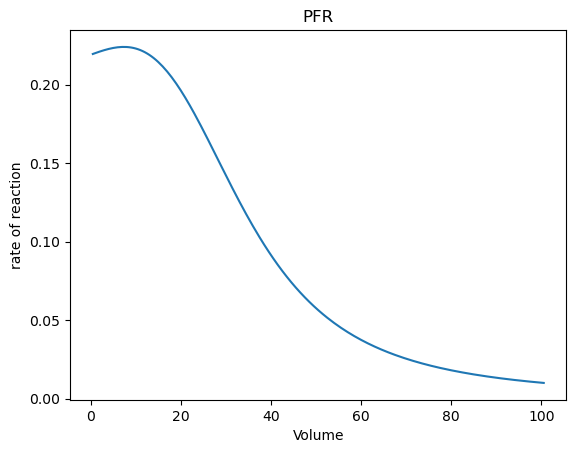

In [7]:
#Sample code for the above graphs
plt.plot(df.V, df.r)
plt.ylabel('rate of reaction')
plt.xlabel('Volume')
plt.title('PFR')